In [ ]:
#!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading-debug gym
#!pip install finta

In [1]:
# Gym stuff
import gym
import gym_anytrading_debug

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import os
import logging

from gym_anytrading_debug.envs import MyStocksEnv
from finta import TA
from datetime import datetime

C:\Users\marti\anaconda3\envs\RL_Trading\lib\site-packages\ale_py\roms\utils.py:90: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for external in metadata.entry_points().get(self.group, []):
C:\Users\marti\anaconda3\envs\RL_Trading\lib\site-packages\ale_py\roms\__init__.py:94: DeprecationWarning: Automatic importing of atari-py roms won't be supported in future releases of ale-py. Please migrate over to using `ale-import-roms` OR an ALE-supported ROM package. To make this warning disappear you can run `ale-import-roms --import-from-pkg atari_py.atari_roms`.For more information see: https://github.com/mgbellemare/Arcade-Learning-Environment#rom-management
  _RESOLVED_ROMS = _resolve_roms()


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



C:\Users\marti\anaconda3\envs\RL_Trading\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


# 1. Load data to train with
 Bring in Crypto ETH/USDT Data 
https://www.cryptodatadownload.com/data/binance/

In [2]:
from csv_import_helper import *
df = import_csv_from_cryptodatadownload('data/Binance_ETHUSDT_d.csv', 'ETH')

#df['SMA'] = TA.SMA(df, 8)
#df['RSI'] = TA.RSI(df)
#df['OBV'] = TA.OBV(df)
#df.fillna(0, inplace=True)
#df.rename(columns={'low': 'price'}, inplace=True)

df['price'] = df['low']

In [3]:
df.head(25)

,open,high,low,close,volume,price
date,,,,,,
2017-08-17,303.61,312.18,298.21,302.00,6155.32,298.21
2017-08-18,302.00,311.79,283.94,293.96,9392.79,283.94
2017-08-19,293.96,299.90,278.00,290.91,2140.08,278.00
2017-08-20,290.91,300.53,282.85,299.10,2469.49,282.85
2017-08-21,299.10,346.52,294.60,323.29,5134.54,294.60
2017-08-22,323.29,330.41,144.21,309.80,7807.91,144.21
2017-08-23,309.80,324.99,309.41,315.74,8532.37,309.41
2017-08-24,315.74,328.04,314.01,323.42,6608.08,314.01
2017-08-25,323.42,338.28,323.42,327.24,7026.71,323.42


# 2. Build Environment

In [4]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'price'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['price','volume','open', 'high', 'close']].to_numpy()[start:end]
    return prices, signal_features

class MyCustomEnv(MyStocksEnv):
    init_data = add_signals

## 2.1 test different combinations with fixed training steps
A new models gets created each time and only the result image gets stored

1588
Training length: 50000
-------------------------------------------------------------------
2022-01-08 19:27:03.557775
windows_size = 8, step_size = 4




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


info {'total_reward': 11292.897568325718, 'balance': 12292.897568325718, 'dollars': 0.0, 'shares': 3.1162915411805447, 'current_price': 3944.72, 'performance': 1.007871010248612}
Performance: 1.007871010248612
-------------------------------------------------------------------
2022-01-08 19:28:33.288499
windows_size = 8, step_size = 8
info {'total_reward': 20307.40256336025, 'balance': 21307.40256336025, 'dollars': 0.0, 'shares': 5.401499362023224, 'current_price': 3944.72, 'performa

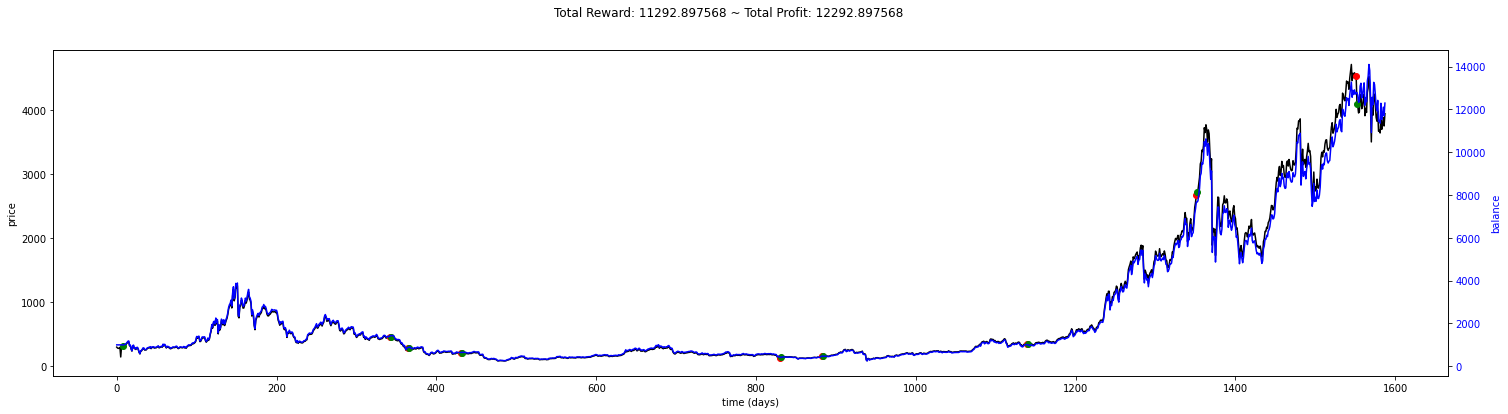

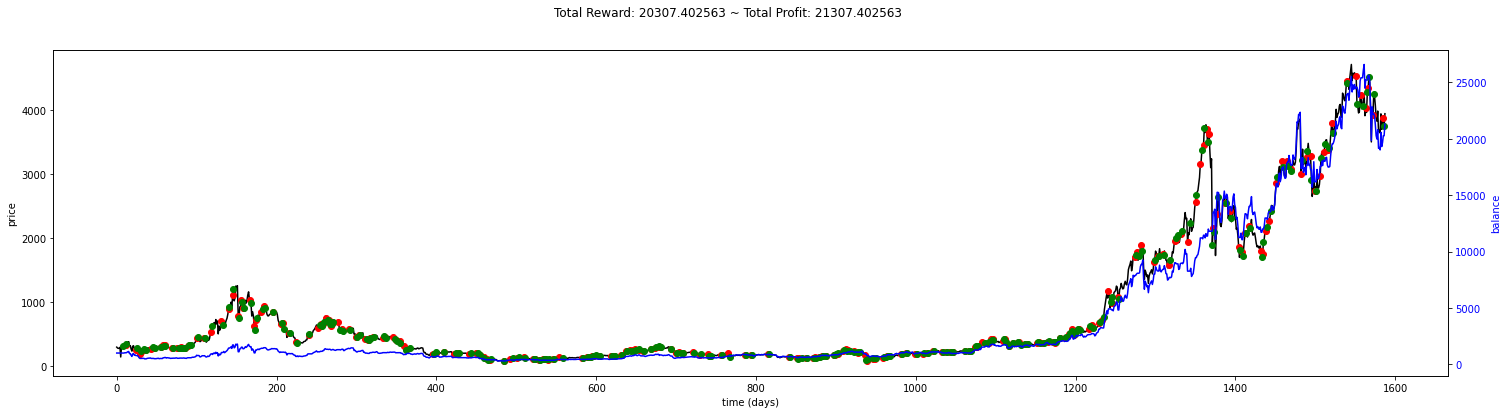

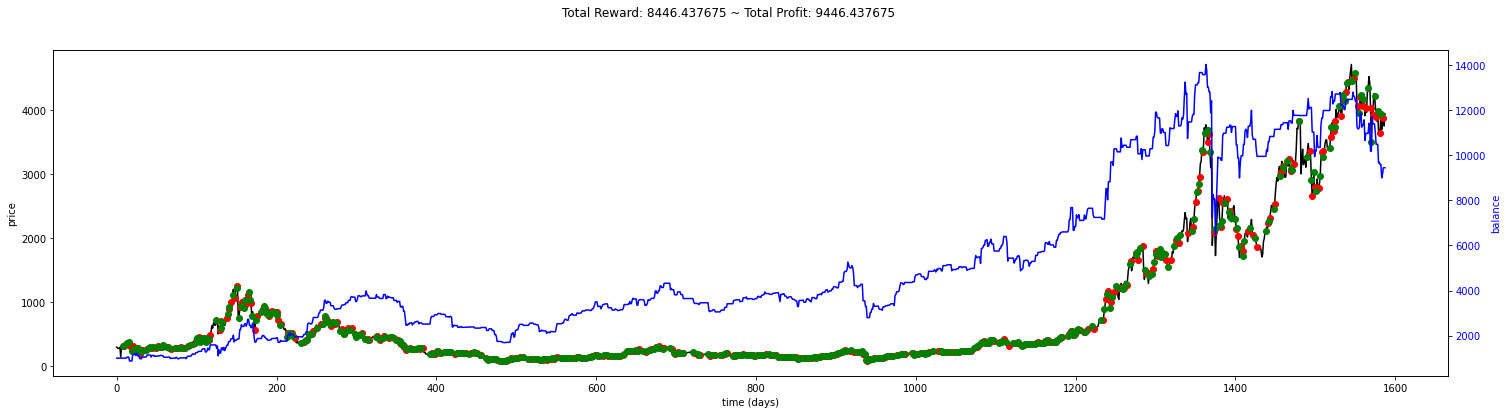

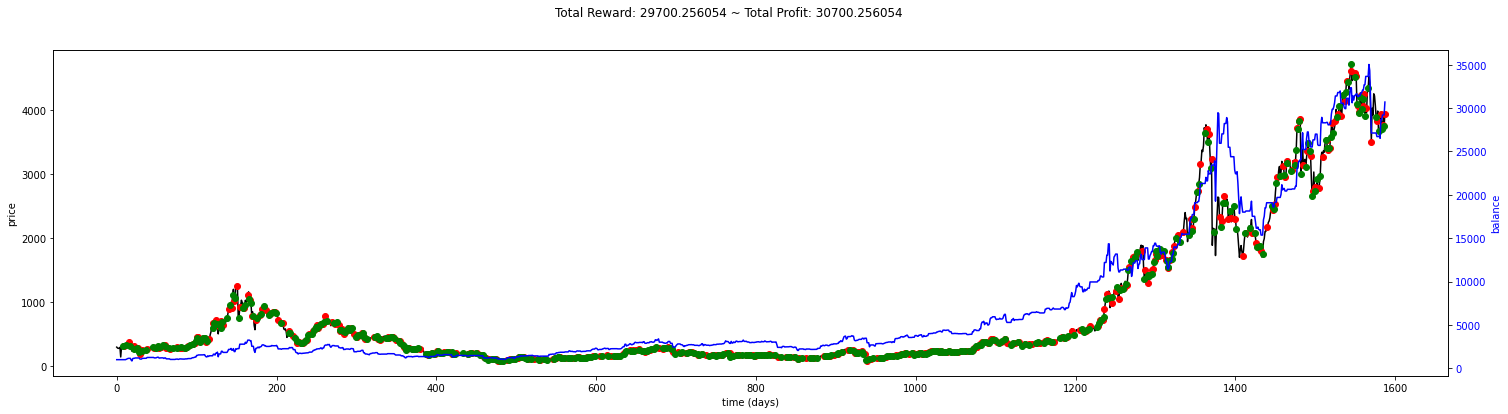

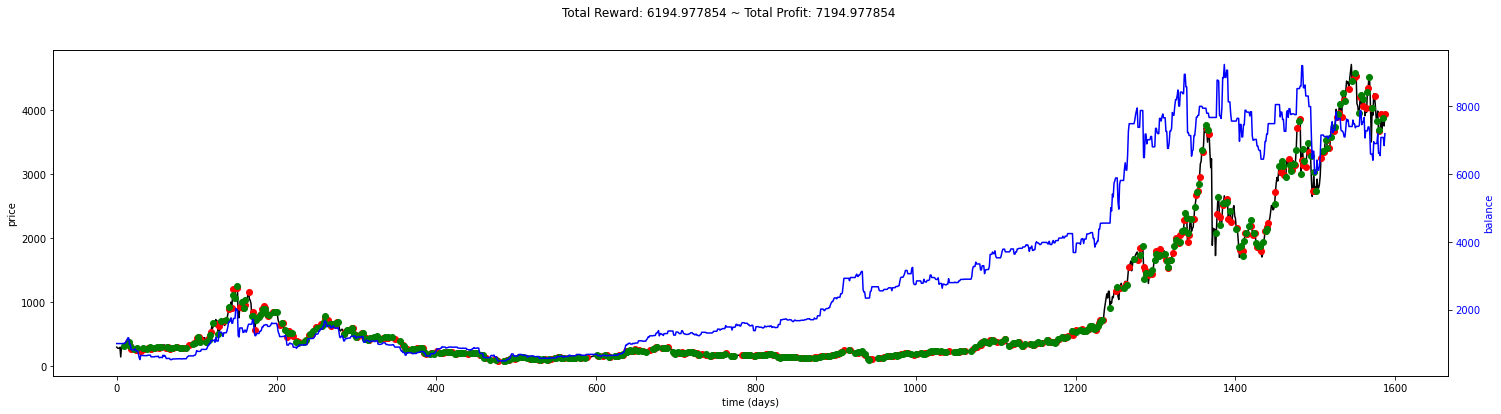

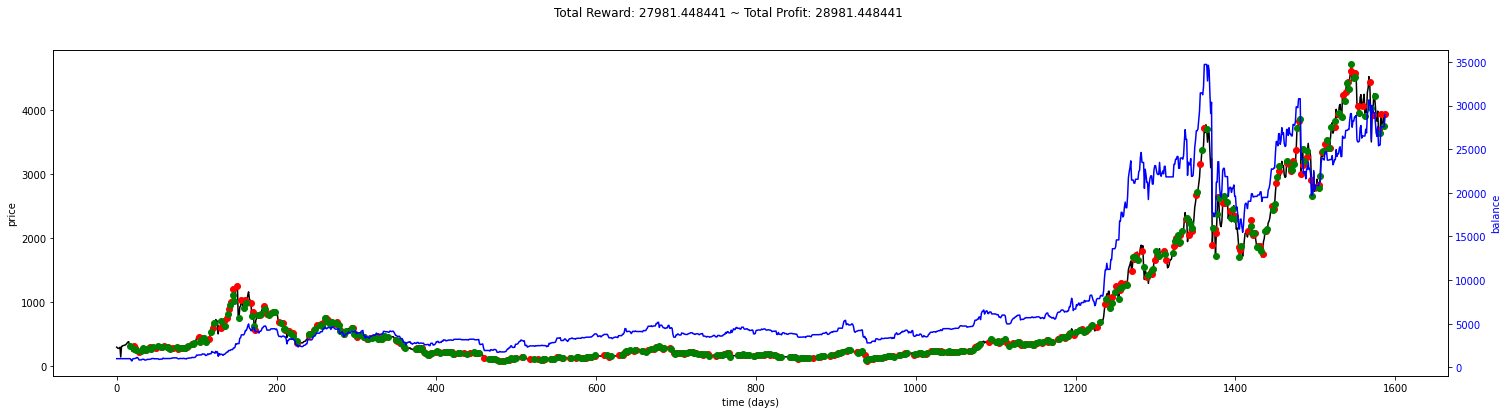

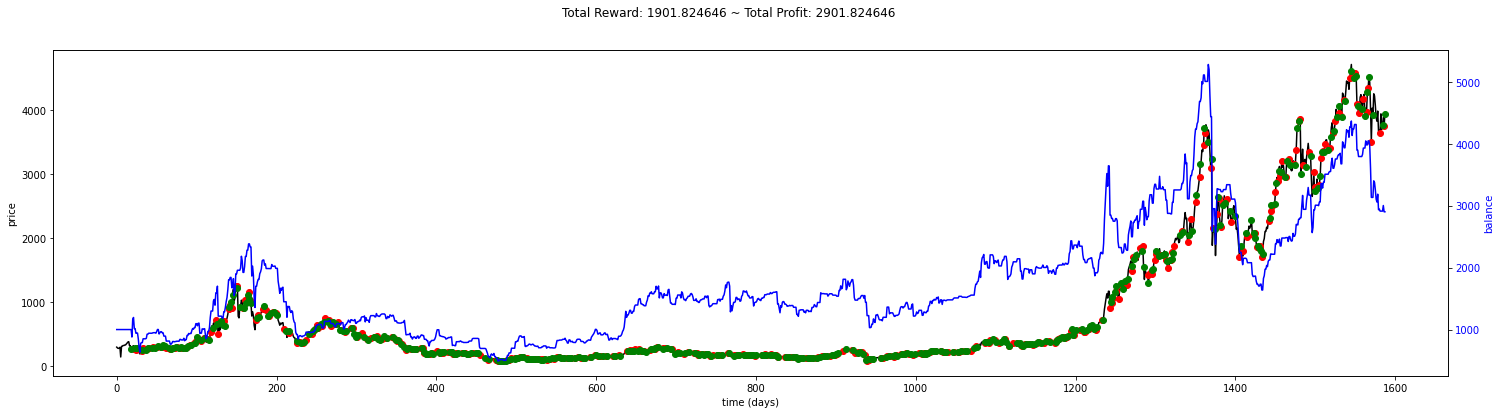

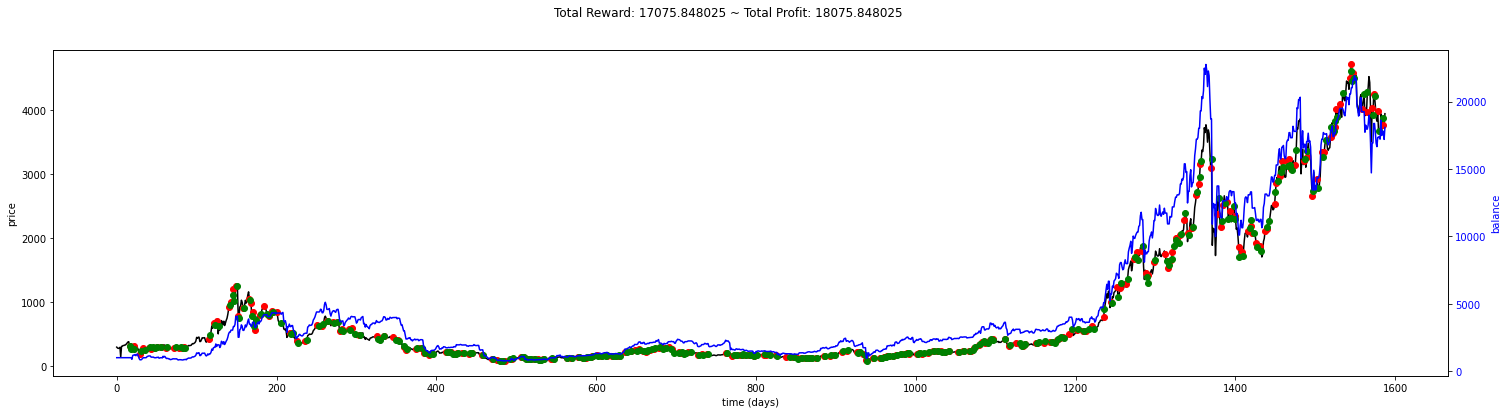

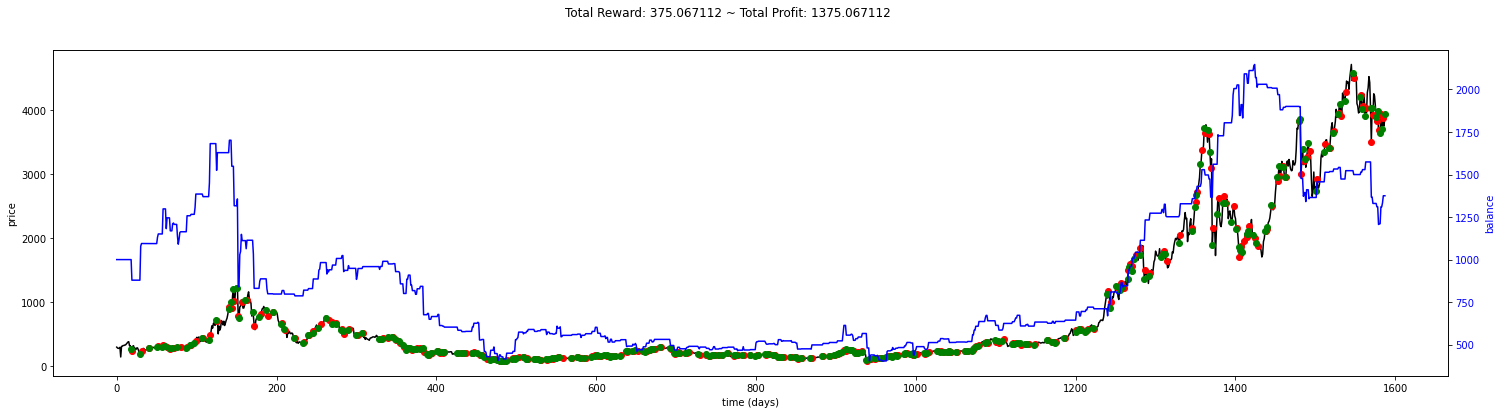

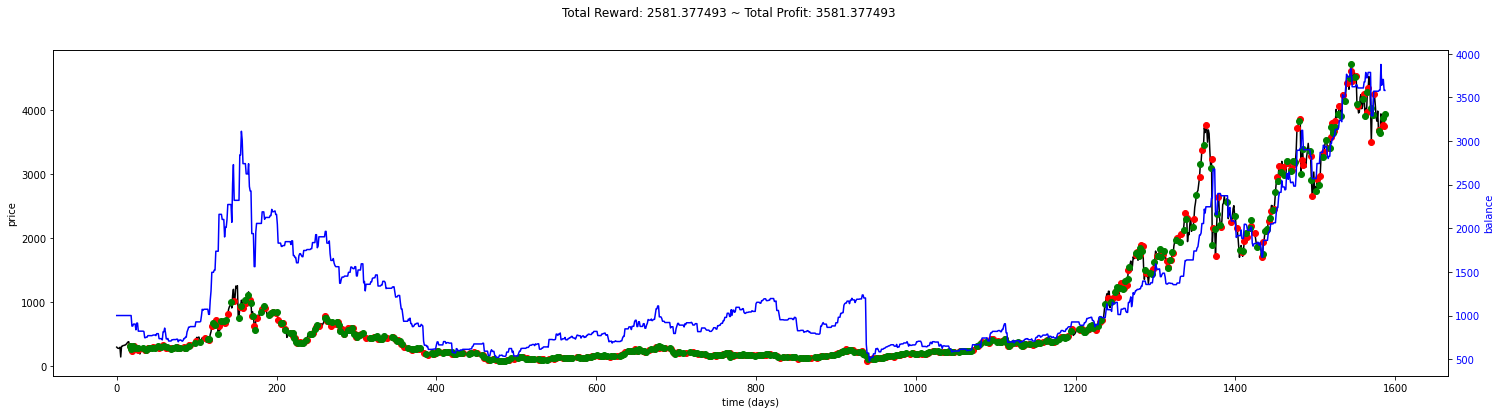

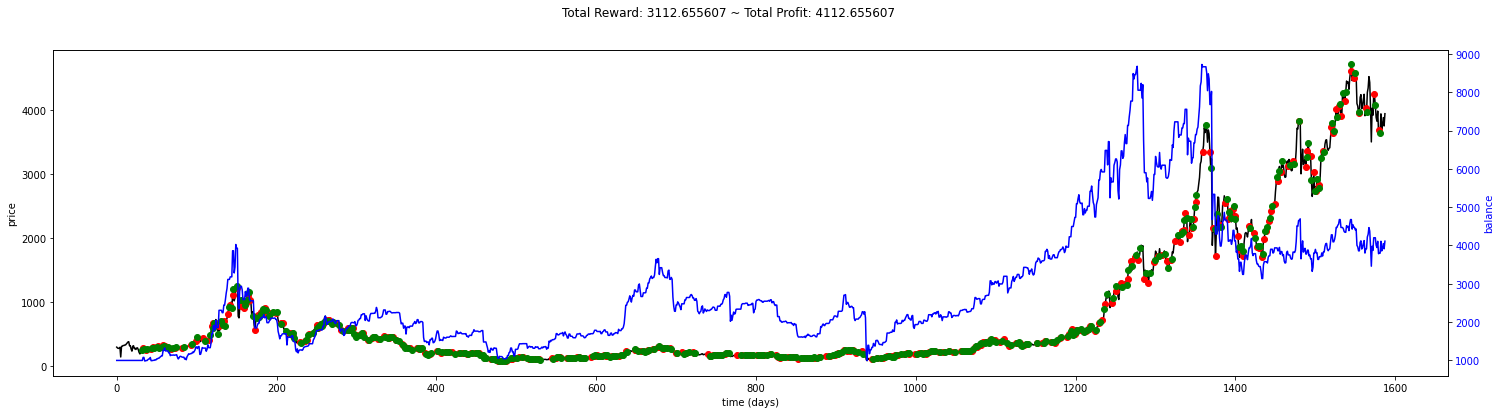

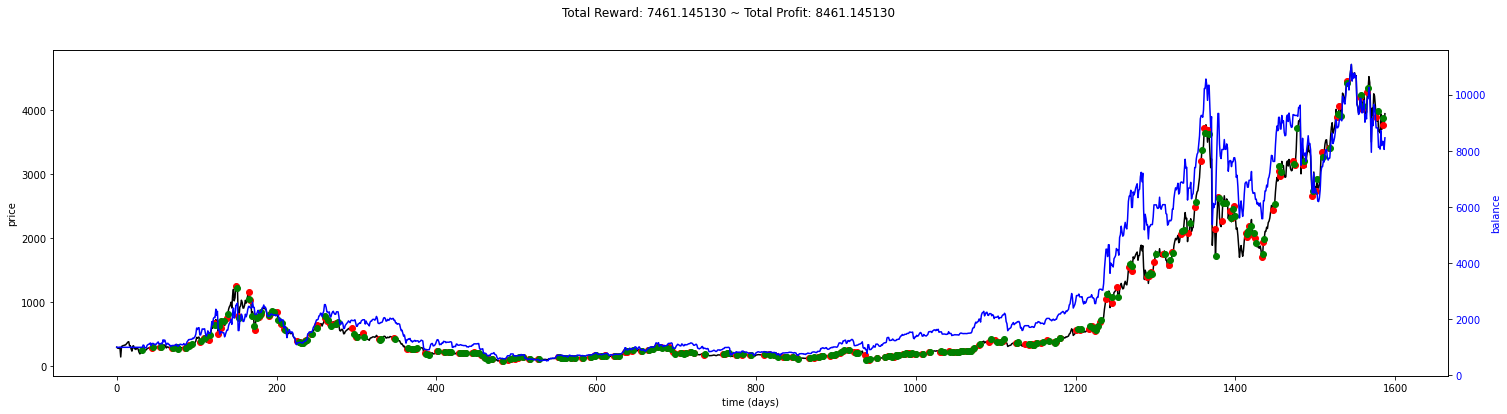

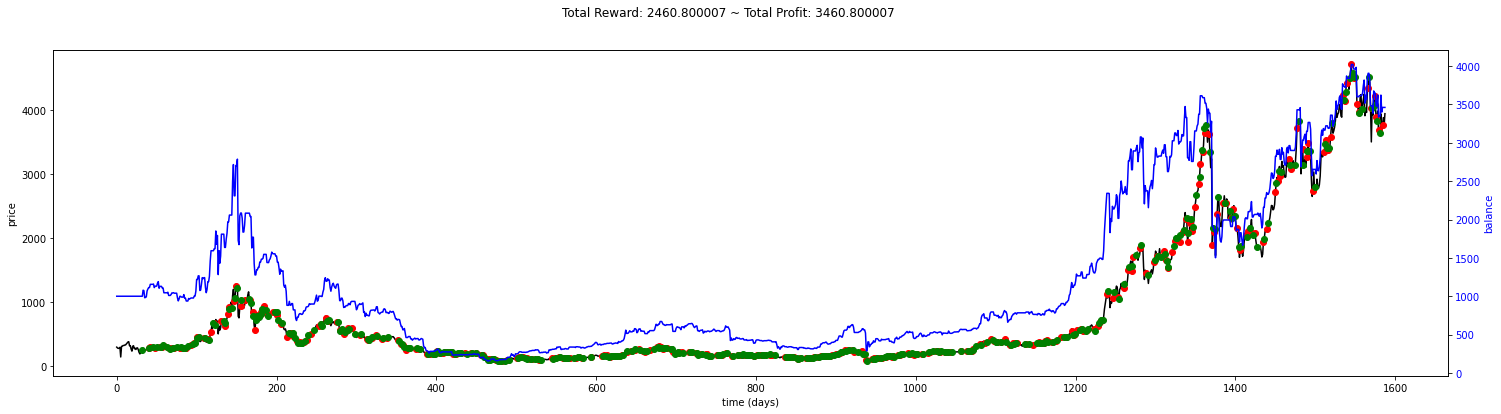

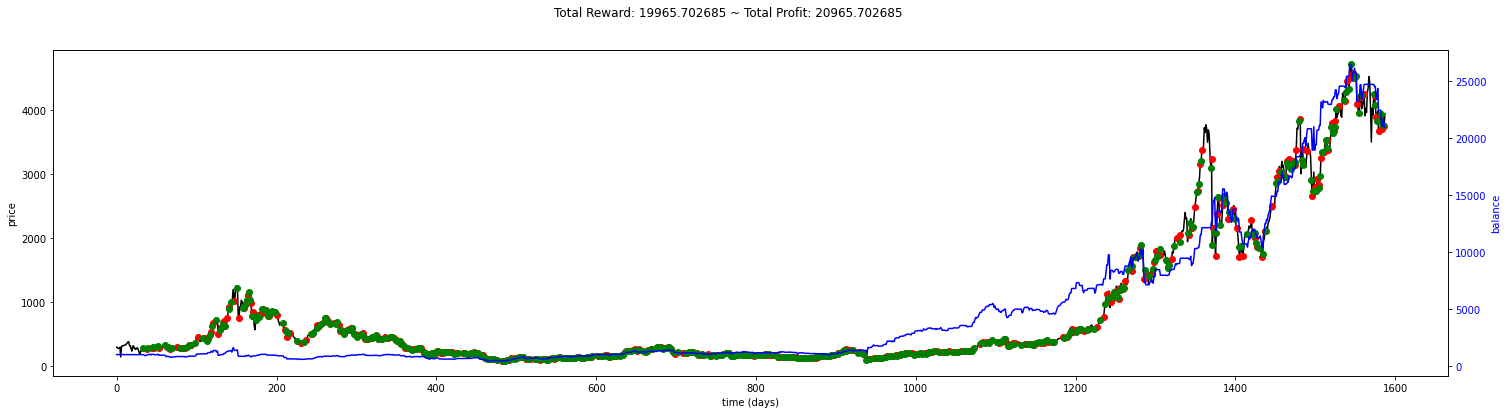

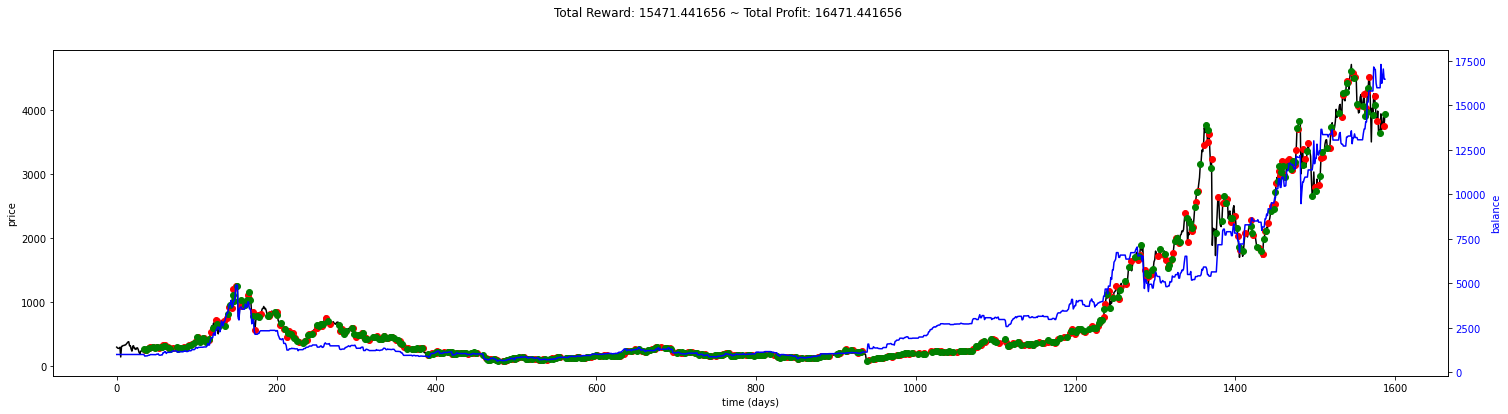

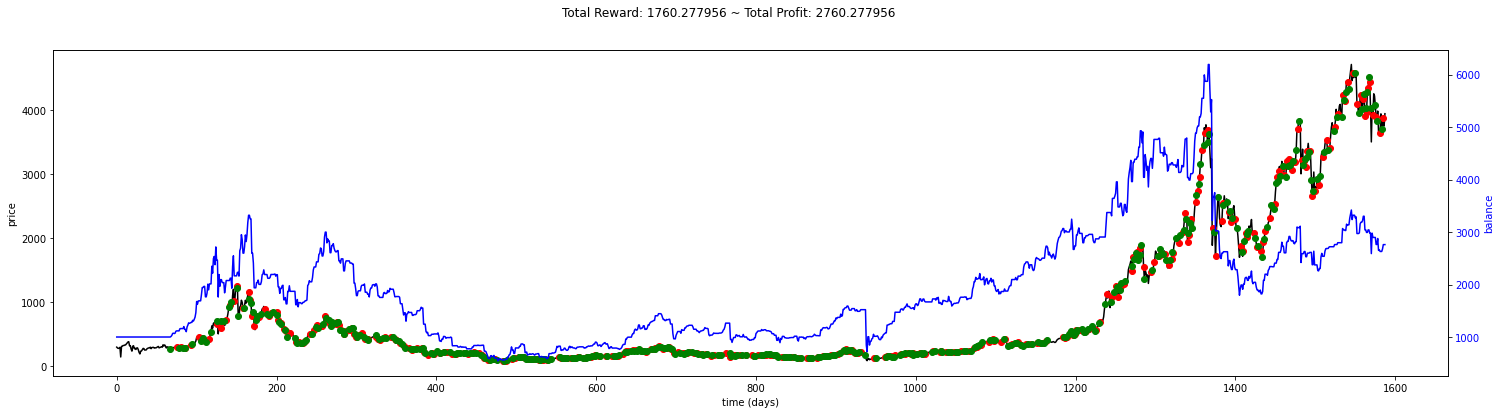

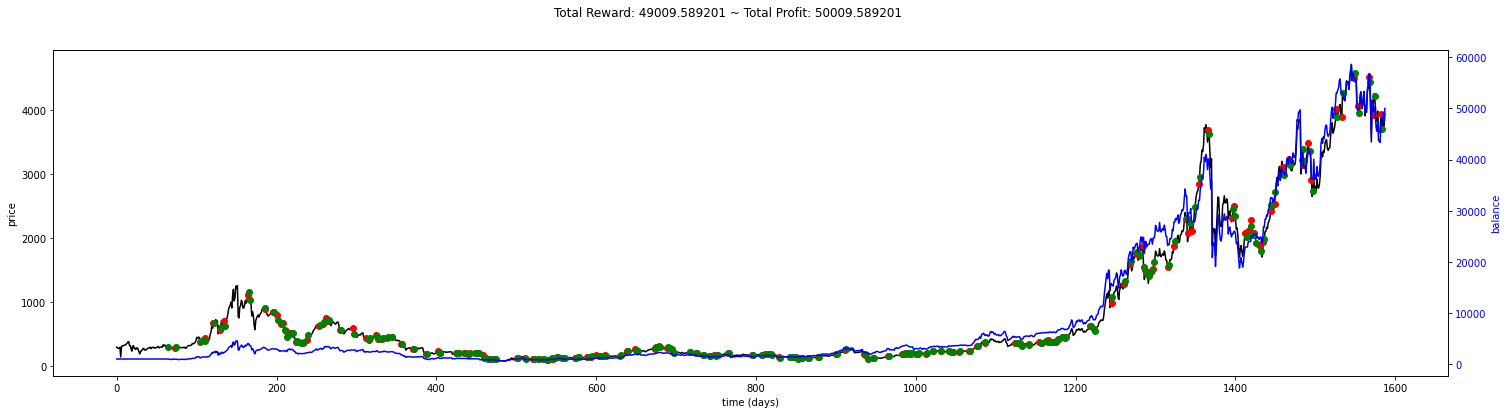

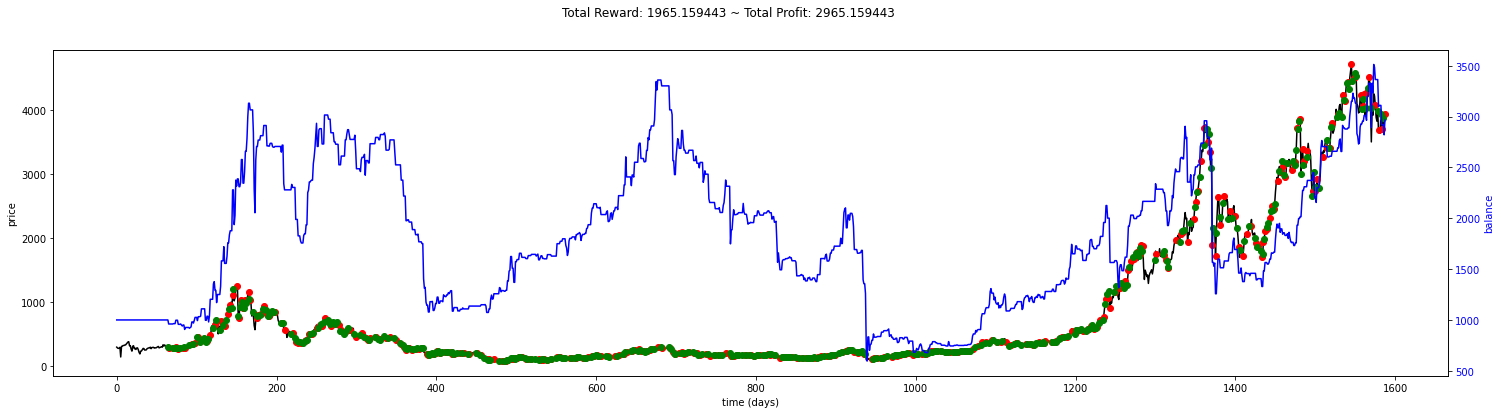

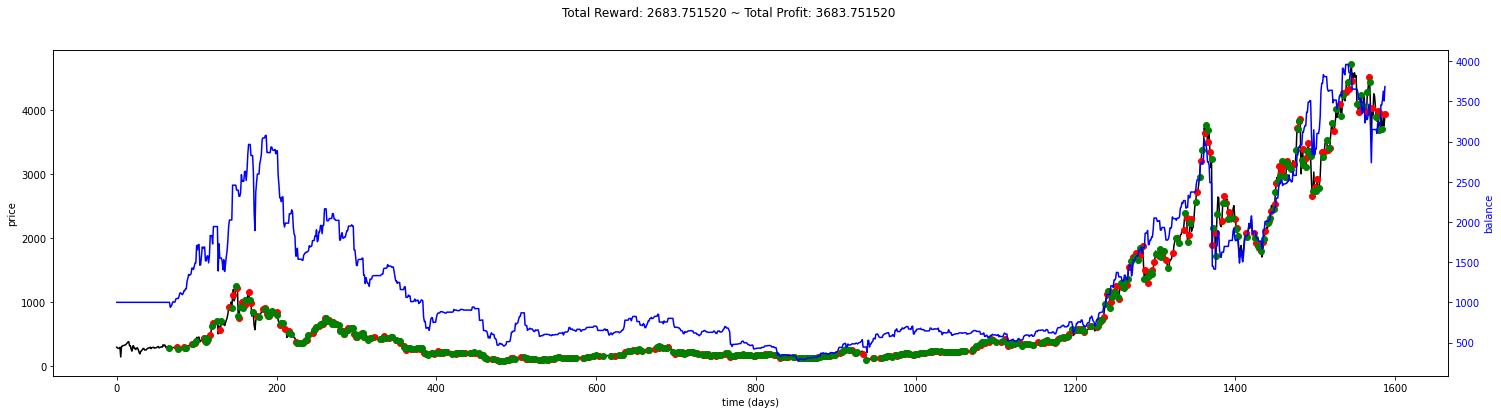

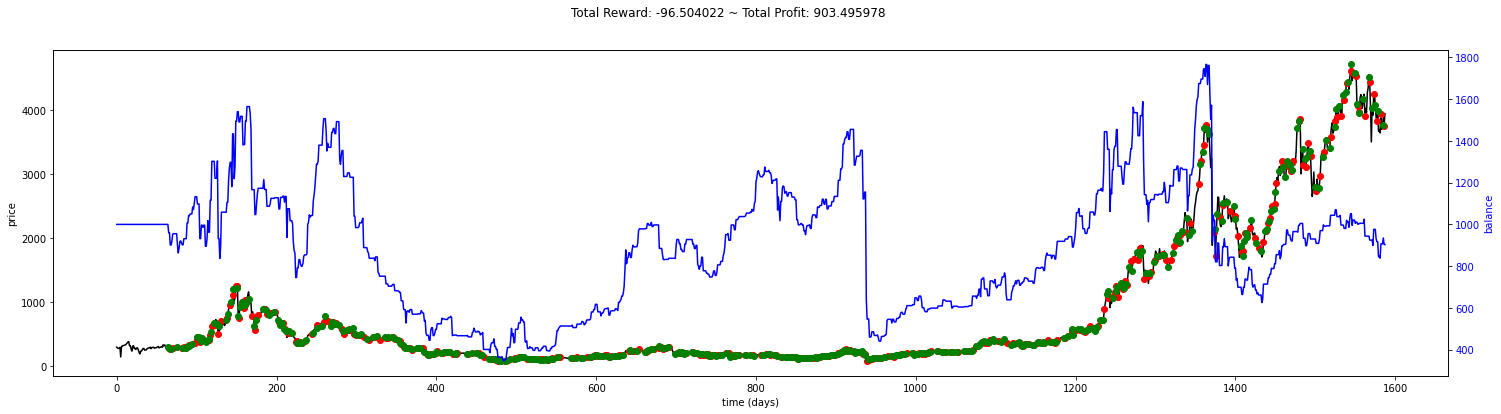

In [5]:
nb_data_rows = len(df.index)
print(nb_data_rows)
list_windows_sizes = [8,16,32,64]
list_step_sizes = [4,8,16,32,64]
training_length = 50000


combinations = [ [8,4], [8,8], [16,4], [16,8] , [16,16], [32,8] , [32,16], [64,32]]

def do_training_and_evaluation():
    # training
    print("-------------------------------------------------------------------")
    print(datetime.now())
    print("windows_size = {0}, step_size = {1}".format(window_size, step_size))
    env = MyCustomEnv(df=df, window_size=window_size, frame_bound=(window_size, 1000), debug=False)
    #print(env.signal_features)
    #print(env.action_space)
    env_maker = lambda: env
    env = DummyVecEnv([env_maker])
    model = A2C('MlpLstmPolicy', env, verbose=0, n_steps=step_size) 
    model.learn(total_timesteps=training_length)
    
    # evaluation
    envTest = MyCustomEnv(df=df, window_size=window_size, frame_bound=(window_size, nb_data_rows), debug=False, log_level=logging.DEBUG)
    obs = envTest.reset()
    while True: 
        obs = obs[np.newaxis, ...]
        action, _states = model.predict(obs)
        obs, rewards, done, info = envTest.step(action)
        if done:
            print("info", info)
            print("Performance: {0}".format(info['performance']))
            break
    file_path = "images\ETH_Daily_Test_W{0}_S{1}.png".format(window_size, step_size)
    envTest.render_all(file_path)

print("Training length: {0}".format(training_length))
#for combination in combinations:
 #   window_size = combination[0]
  #  step_size = combination[1]
   # do_training_and_evaluation()


for i in list_windows_sizes:
    for j in list_step_sizes:
        window_size = i
        step_size = j
        do_training_and_evaluation()


# 4. Evaluation

In [ ]:
envTest = MyCustomEnv(df=df, window_size=window_size, frame_bound=(window_size, nb_data_rows), debug=True, log_level=logging.DEBUG)
obs = envTest.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = envTest.step(action)
    if done:
        print("info", info)
        print("Performance: {0}".format(info['performance']))
        break

In [ ]:
#plt.cla()
envTest.render_all()
#plt.figure(figsize=(25,6))
#plt.show()

In [ ]:
import logging

learn = True
eval_nb = 10

file_name = 'A2C_Trading_Model1_Daily_winsize12_V1'

model_path = os.path.join('SavedModels', file_name)

episode = 0
training_file_name = 'A2C_TM1_ETH_D_w12_'

#Training loop
while learn:

    model = A2C.load(model_path, env)

    # train
    model.learn(total_timesteps=100000)

    # evaluate for eval_nb times, perfomance must be always above 1
    perfomance_results = []

    envTest = MyCustomEnv(df=df, window_size=window_size, frame_bound=(13, nb_data_rows), debug=True, log_level=logging.DEBUG)
    for i in range(0, eval_nb):
        obs = envTest.reset()
        performance = 1.0
        print("Start eval nb. {0}".format(i))
        while True: 
            obs = obs[np.newaxis, ...]
            action, _states = model.predict(obs)
            obs, rewards, done, info = envTest.step(action)
            if done:
                print("info", info)
                perfomance_results.append(info['performance'])
                break

    # check results
    print(perfomance_results)
    if all(x > 3.0 for x in perfomance_results):
        print("Yes, mission acomplished!!")
        learn = False
    else:
        print("No, train further")
        
    #save model
    temp_file_name = "{0}E{1}".format(training_file_name, episode)
    model_path = os.path.join('SavedModels', temp_file_name)
    model.save(model_path)
    
    episode += 1

In [ ]:
model_path = os.path.join('SavedModels', 'A2C_Trading_Model0_Sin_winsize12_Init')
#model.save(model_path)